In [3]:
#importing libraries 
import pandas as pd 
from datasets import load_dataset 
import matplotlib.pyplot as plt 
import ast

#loading data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#cleaning data 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

#filtering data
df_DA = df[df['job_title_short'] == "Data Analyst"].copy()

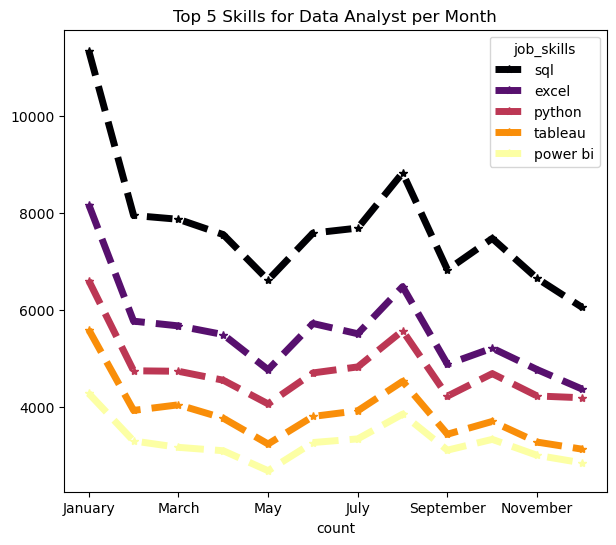

In [4]:
#Creating a new column of month no.
df_DA['job_posted_month_no'] =  df_DA['job_posted_date'].dt.month

#exploding the job skills and pivoting 
df_DA_exploded = df_DA.explode('job_skills')
df_DA_pivot = df_DA_exploded.pivot_table( index = 'job_posted_month_no' , columns = 'job_skills' , aggfunc = 'size' , fill_value = 0)

#sort the skills by count 
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending = False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

#use month names for plotting 
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x : pd.to_datetime(x , format = '%m').strftime('%B'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns = 'job_posted_month_no')

#plotting 
df_DA_pivot.iloc[: , :5].plot(kind = "line",
    linewidth = 5,
    linestyle = '--',
    colormap = 'inferno',
    marker = '*',
    markersize = 6,
    figsize = (7,6)
    
    )

plt.title('Top 5 Skills for Data Analyst per Month')
plt.xlabel('count')
plt.ylabel("")
plt.show()




**CUSTOMIZING SCATTER PLOT**

In [8]:
df_exploded = df_DA.explode('job_skills')
skill_stat = df_exploded.groupby('job_skills').agg(
    median_salary = ('salary_year_avg' , "median"),
    skill_count = ('job_skills', 'count')
)
#limit to top 20 skills 
skill_count = 20 
skill_stat = skill_stat.sort_values('skill_count' , ascending = False).head(skill_count)

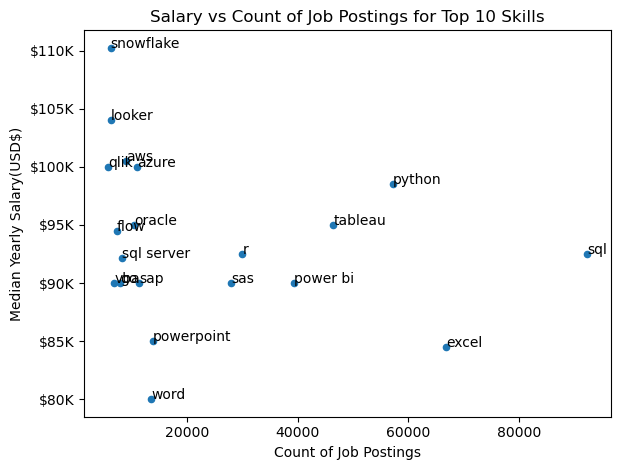

In [16]:

skill_stat.plot(kind = 'scatter' , x= 'skill_count' , y= 'median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary(USD$)')
plt.title('Salary vs Count of Job Postings for Top 10 Skills')
plt.tight_layout()
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos : f'${int(y/1000)}K'))
for i,txt in enumerate(skill_stat.index):
    plt.text(skill_stat['skill_count'].iloc[i], skill_stat['median_salary'].iloc[i] , txt)